# Simple Linear Regression

#### 1 independent feature (ADMIN) and 1 target feature(PROFIT)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Estimate profit based on ADMIN budget
#### Perform scatter plot on PROFIT vs ADMIN


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

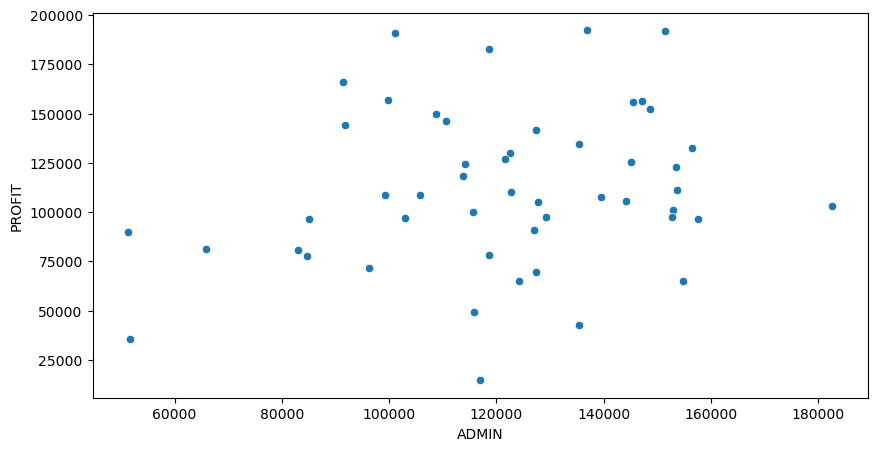

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df,x = "ADMIN", y = "PROFIT")
plt.show()

### Seperate x (ADMIN) and  y (PROFIT)

In [13]:
x = df[["ADMIN"]]
y = df[["PROFIT"]]

In [14]:
x.head()

,ADMIN
0,136897.80
1,151377.59
2,101145.55
3,118671.85
4,91391.77


In [15]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Create a linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

### Get the slope and Intercept

In [17]:
Slope = model.coef_
intercept = model.intercept_
print(f"Slope : {Slope} , Intercept : {intercept}")

Slope : [[0.2887492]] , Intercept : [76974.47130542]


### PROFIT(estimated) = 76974.5 + 0.2887 * ADMIN
#### Out of sample prediction
##### estimate the profit for startup with ADMIN spend of 100000

In [20]:
admin = 1_00_000
profit_pred = model.predict([[admin]])
print(f"Predicted profit : {profit_pred}")

Predicted profit : [[105849.39154094]]


In [21]:
admin = 2_00_000
profit_pred = model.predict([[admin]])
print(f"Predicted profit : {profit_pred}")

Predicted profit : [[134724.31177646]]


## PLOT REGRESSION PLOT

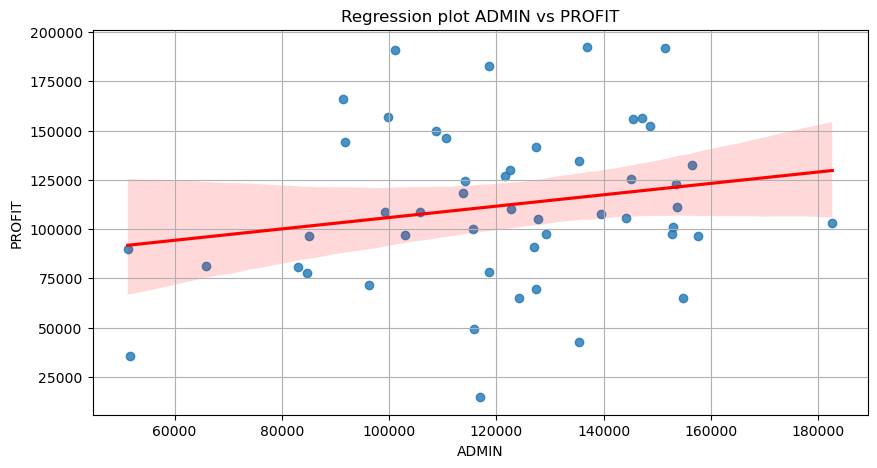

In [22]:
plt.figure(figsize=(10,5))
sns.regplot(data=df,x= "ADMIN",y="PROFIT",line_kws={"color" : "red"})
plt.title("Regression plot ADMIN vs PROFIT")
plt.grid()
plt.show()

### Model Evaluation

##### 1. Mean Squared Error(MSE) 
##### 2. Root mean squared error(RMSE)
##### 3. Mean Absolute Error (MAE)
##### 4. Mean Absolute Percentage Error (MAPE)
##### 5. R2 score

###### predict values of x data

In [24]:
ypred = model.predict(x)
ypred[0:5]

array([[116503.6018596 ],
       [120684.62967237],
       [106180.1681897 ],
       [111240.87333494],
       [103363.77199475]])

In [25]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score
mse = mean_squared_error(y,ypred)
rmse = mse**(1/2)
mae = mean_absolute_error(y,ypred)
mape = mean_absolute_percentage_error(y,ypred)
r2_score= r2_score(y,ypred)

In [38]:
print(f'''Mean Squared Error : {mse:.2f},
      Root Mean Squared Error : {rmse:.2f},
      Mean Absolute Error : {mae:.2f},
      Mean Absolute Percentage Error : {mape:.2f},
      R2 Score : {r2_score:.2f}''')

Mean Squared Error : 1527955397.74,
      Root Mean Squared Error : 39089.07,
      Mean Absolute Error : 30659.81,
      Mean Absolute Percentage Error : 0.44,
      R2 Score : 0.04


### from above results we can predict that there is no perfect relationship betweeb ADMIN and  PROFIT features
### R2 Score - coefficient of correaltion is 0.04 which is near to zero , so we can say that this Linear Regression Model can not be used for future prediction.